In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('auctions_cata.csv')
df.head()

,auction_id,bid,buyout,unit_price,quantity,time_left,item_id,item_name,quality,item_class,...,purchase_price_gold,required_level,item_level,sell_price_gold,first_appearance_timestamp,first_appearance_year,first_appearance_month,first_appearance_day,first_appearance_hour,hours_on_sale
0,1240844788,50.0000,50.0000,50.000000,1,0.5,43418,Glyph of Heroic Throw,Common,Glyph,...,0,25,25,0,2024-06-23 15:00:00,2024,6,23,15,1
1,1240844884,75.0000,75.0000,75.000000,1,0.5,43413,Glyph of Rapid Charge,Common,Glyph,...,0,25,25,0,2024-06-23 15:00:00,2024,6,23,15,1
2,1240891138,114.9500,121.0000,120.999603,1,0.5,55822,Heavy Geode Mace,Rare,Weapon,...,108,81,316,21,2024-06-23 15:00:00,2024,6,23,15,1
3,1240898677,6.7499,7.1051,7.105100,1,0.5,52985,Azshara's Veil,Common,Trade Goods,...,0,0,82,0,2024-06-23 15:00:00,2024,6,23,15,1
4,1240898680,6.7499,7.1051,7.105100,1,0.5,52985,Azshara's Veil,Common,Trade Goods,...,0,0,82,0,2024-06-23 15:00:00,2024,6,23,15,1


In [4]:
numerical = ['bid', 'buyout', 'unit_price', 'quantity', 'time_left', 'hours_on_sale']
categorical = ['quality', 'item_class', 'item_subclass', 'is_stackable']

In [5]:
df[numerical].describe()

,bid,buyout,unit_price,quantity,time_left,hours_on_sale
count,422365.000000,422365.000000,422365.000000,422365.000000,422365.000000,422365.000000
mean,236.495055,490.884365,428.344601,5.688397,44.531068,30.663786
std,2961.717424,3789.135976,2907.187636,9.936961,10.814172,20.482409
min,0.000100,0.000000,0.000000,1.000000,0.500000,1.000000
25%,8.672600,9.998000,1.999900,1.000000,48.000000,17.000000
50%,37.673200,40.999000,14.999900,1.000000,48.000000,26.000000
75%,133.000000,150.729000,126.703598,7.000000,48.000000,49.000000
max,307150.000000,307150.000000,200000.000000,250.000000,48.000000,165.000000


<BarContainer object of 4 artists>

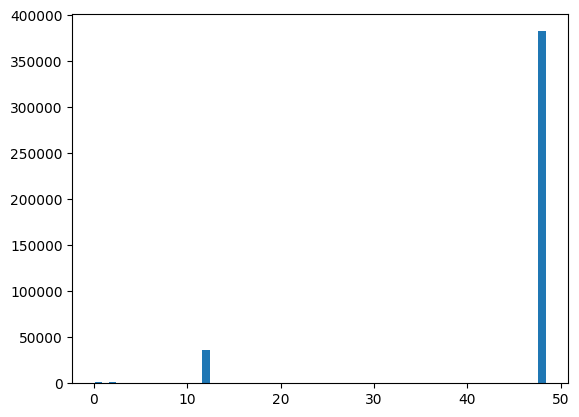

In [6]:
time_left_values = df['time_left'].value_counts().reset_index(name='Counts')

plt.bar(time_left_values.time_left, time_left_values.Counts)

[]

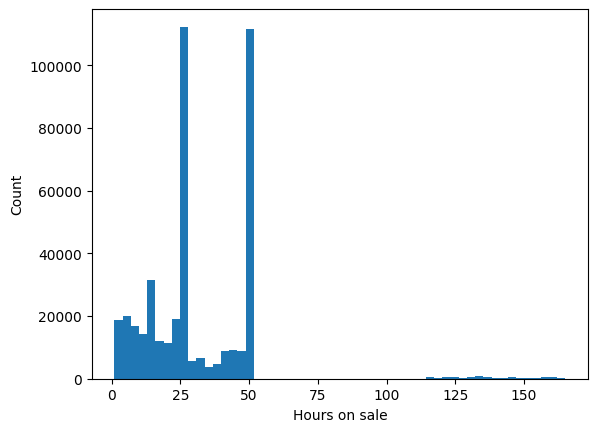

In [7]:
plt.hist(df.hours_on_sale, bins=55)
plt.xlabel('Hours on sale')
plt.ylabel('Count')
plt.plot()

In [8]:
df.query('hours_on_sale > 100')['hours_on_sale'].count()

6192

In [10]:
df.query('hours_on_sale > 100').head()

,auction_id,bid,buyout,unit_price,quantity,time_left,item_id,item_name,quality,item_class,...,purchase_price_gold,required_level,item_level,sell_price_gold,first_appearance_timestamp,first_appearance_year,first_appearance_month,first_appearance_day,first_appearance_hour,hours_on_sale
20343,1252524334,5.0101,8.0101,8.01010,1,48.0,10183,Swashbuckler's Boots,Uncommon,Armor,...,5,49,54,1,2024-06-25 20:00:00,2024,6,25,20,165
20344,1252525968,2.9900,3.9900,3.99000,1,48.0,7078,Essence of Fire,Uncommon,Trade Goods,...,0,0,55,0,2024-06-25 20:00:00,2024,6,25,20,165
20475,1252633367,3.0202,3.0202,0.15101,20,48.0,2934,Ruined Leather Scraps,Common,Trade Goods,...,0,0,5,0,2024-06-25 21:00:00,2024,6,25,21,164
20476,1252633401,3.0202,3.0202,0.15101,20,48.0,2934,Ruined Leather Scraps,Common,Trade Goods,...,0,0,5,0,2024-06-25 21:00:00,2024,6,25,21,164
20477,1252633430,3.0202,3.0202,0.15101,20,48.0,2934,Ruined Leather Scraps,Common,Trade Goods,...,0,0,5,0,2024-06-25 21:00:00,2024,6,25,21,164


[]

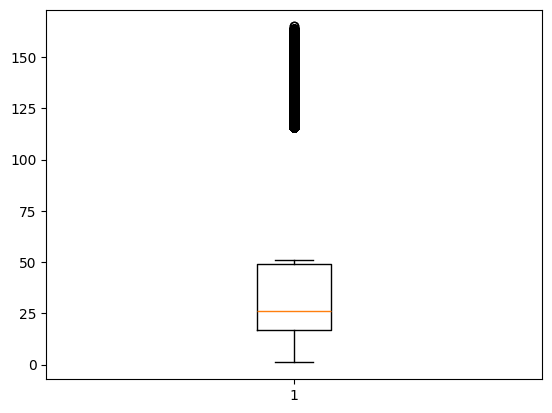

In [54]:
plt.boxplot(df.hours_on_sale)
plt.plot()

<Axes: >

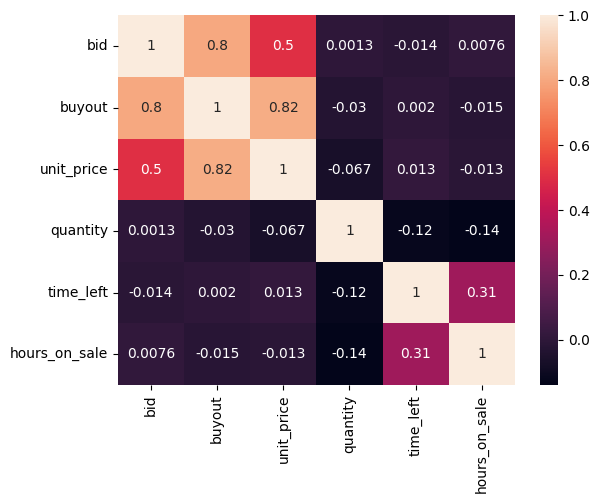

In [45]:
sns.heatmap(df[numerical].corr(), annot=True)

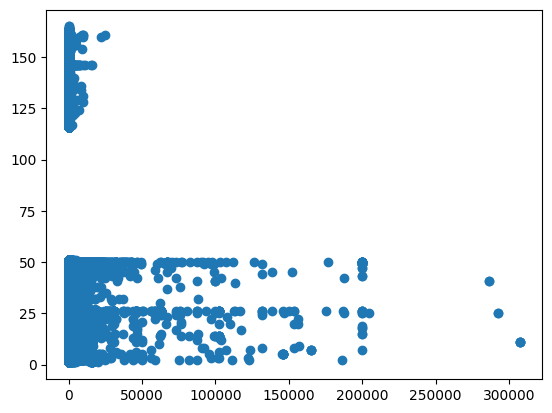

In [48]:
plt.scatter(df.buyout, df.hours_on_sale)

## Items

In [4]:
items_wotlk = pd.read_csv('../data/items_wotlk.csv')
items_cata = pd.read_csv('../data/items_cata.csv')

print(f'Length of items_wotlk: {len(items_wotlk)}')
print(f'Length of items_cata: {len(items_cata)}')

items_cata.head()

Length of items_wotlk: 10396
Length of items_cata: 5569


,item_id,item_name,quality,item_level,required_level,item_class,item_subclass,purchase_price_gold,purchase_price_silver,sell_price_gold,sell_price_silver,max_count,is_stackable
0,40,Recruit's Boots,Common,1,0,Armor,Cloth,0,0,0,0,0,0
1,117,Tough Jerky,Common,5,1,Consumable,Food & Drink,0,0,0,0,0,1
2,118,Minor Healing Potion,Common,5,1,Consumable,Potion,0,0,0,0,0,1
3,159,Refreshing Spring Water,Common,5,1,Consumable,Food & Drink,0,0,0,0,0,1
4,422,Dwarven Mild,Common,25,15,Consumable,Food & Drink,0,5,0,0,0,1


In [16]:
items = pd.concat([items_wotlk, items_cata])
items = items.drop_duplicates(subset=['item_id'])
items.set_index('item_id')

print(f'Length of items: {len(items)}')

items.head(5)

Length of items: 11655


,item_id,item_name,quality,item_level,required_level,item_class,item_subclass,purchase_price_gold,purchase_price_silver,sell_price_gold,sell_price_silver,max_count,is_stackable
0,35,Bent Staff,Common,2,1,Weapon,Staff,0,0,0,0,0,0
1,36,Worn Mace,Common,2,1,Weapon,Mace,0,0,0,0,0,0
2,38,Recruit's Shirt,Common,1,0,Armor,Miscellaneous,0,0,0,0,0,0
3,39,Recruit's Pants,Poor,1,1,Armor,Cloth,0,0,0,0,0,0
4,40,Recruit's Boots,Common,1,0,Armor,Miscellaneous,0,0,0,0,0,0


In [19]:
items.to_csv('../data/items.csv', index=False)